<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/kfcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Wczytanie danych
data = pd.read_csv("femtodos.csv", delimiter=";")

In [ ]:
# Przetworzenie danych
# Konwersja przecinków na kropki w danych liczbowych (jeśli występują)
data['bmi'] = data['bmi'].str.replace(',', '.').astype(float)
data['SBP'] = data['SBP'].str.replace(',', '.').astype(float)
data['DBP'] = data['DBP'].str.replace(',', '.').astype(float)

In [ ]:
# Kodowanie kolumny 'Is.Obese' oraz 'preh' na wartości numeryczne
label_encoder = LabelEncoder()
data['Is.Obese'] = label_encoder.fit_transform(data['Is.Obese'])
data['preh'] = label_encoder.fit_transform(data['preh'])  # 'PRE' = 1, 'REGULAR' = 0

In [ ]:
# Wybór cech i etykiet
X = data[['Age', 'Is.Obese', 'bmi', 'wc', 'hc', 'whr', 'SBP', 'DBP']]
y = data['preh']  # Etykieta do klasyfikacji

In [ ]:
# Podział danych na zestawy treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [ ]:
# Tworzenie i trenowanie modelu klasyfikacji (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Dokonywanie predykcji na zbiorze testowym
y_pred = model.predict(X_test)

In [ ]:
# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")

Dokładność modelu: 98.53%


Macierz pomyłek:
[[26  0]
 [ 1 41]]


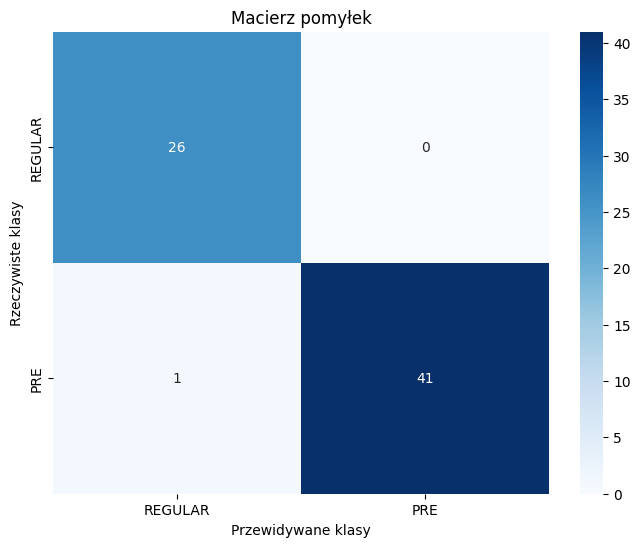

In [ ]:
# Wyświetlenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
print(conf_matrix)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['REGULAR', 'PRE'], yticklabels=['REGULAR', 'PRE'])
plt.xlabel("Przewidywane klasy")
plt.ylabel("Rzeczywiste klasy")
plt.title("Macierz pomyłek")
plt.show()

In [ ]:
# Testowanie na nowych danych z nazwami kolumn
sample_data = pd.DataFrame([[25, 0, 27.5, 85, 105, 80, 120, 80]], columns=['Age', 'Is.Obese', 'bmi', 'wc', 'hc', 'whr', 'SBP', 'DBP'])
predicted_class = model.predict(sample_data)
print(f"Przewidywana klasa dla przykładowych danych: {'PRE' if predicted_class[0] == 1 else 'REGULAR'}")

Przewidywana klasa dla przykładowych danych: PRE


In [ ]:
# Walidacja krzyżowa (5-krotna)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Wyniki walidacji krzyżowej (5-krotna): {cv_scores}")
print(f"Średnia dokładność walidacji krzyżowej: {np.mean(cv_scores) * 100:.2f}%")

Wyniki walidacji krzyżowej (5-krotna): [1.         0.97777778 1.         1.         1.        ]
Średnia dokładność walidacji krzyżowej: 99.56%


In [ ]:
# Użycie Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
cv_scores = cross_val_score(model, X, y, cv=loo)
print(f"Wyniki Leave-One-Out Cross-Validation: {cv_scores}")
print(f"Średnia dokładność LOOCV: {np.mean(cv_scores) * 100:.2f}%")

Wyniki Leave-One-Out Cross-Validation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Średnia dokładność LOOCV: 99.55%
